# Описание

## Цель

Провести общий анализ игрового рынка, выявить закономерности, определяющие успех игр.  
Гипотезы:
* Наиболее популярными жанрами являются __Shooter__ и __Action__
* Платформы от Microsoft являются более популярными, чем платформы от Sony.

Полученная информация позволит заказчику понять, какой продукт является наиболее популярным, и спланировать дальнейшие действия.

## Входные данные

Данные, содержащие информацию о продаже игр на различных платформах за 2016 год

## Этапы

* Первичная предобработка / очистка данных
* Анализ данных
* Подтверждение или опровержение гипотез

## Первичная предобработка / очистка данных

In [629]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")

In [630]:
df = pd.read_csv('./games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
df.shape

(16719, 16)

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [634]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Пропуски

Удалим игры без названия

In [635]:
df.dropna(subset = ["Name"], inplace = True)

Удалим игры, у которых неизвестен год релиза.  
Заменим тип данных столбца __Year_of_Release__ на __int__, а у __User_Score__ на _float64_

In [636]:
df.dropna(subset = ["Year_of_Release"], inplace = True)
df["Year_of_Release"] = df["Year_of_Release"].astype('int')
df["Year_of_Release"].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

### Дубликаты

Посмотрим, есть ли дубликаты в столбцах: __Name__, __Platform__, __Year_of_Release__, __Genre__.  

In [637]:
df[df.duplicated(subset = ["Name", "Platform", "Year_of_Release", "Genre"], keep = False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [638]:
df.drop_duplicates(subset = ["Name", "Platform", "Year_of_Release", "Genre"], keep = 'first', inplace = True)

### Платформы

In [639]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Оценки

In [640]:
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметим, что есть значение 'tbd':  
_tbd_ (to be determined "Англ") - означает, что рейтинг будет показан лишь через некоторое время.  
Пока заменим на nan

In [641]:
df["User_Score"].replace('tbd', np.nan, inplace = True)
df["User_Score"] = df["User_Score"].astype('float64')

Сравним оценки пользователей с оценками критиков

In [642]:
df["Critic_Score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Приведем все значения к диапазону [0, 100]

In [643]:
df["User_Score"] *= 10

In [644]:
df.User_Score.unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

### Рейтинг

In [645]:
df.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг формируется за счет ESRB (Entertainment Software Rating Board)  
__EC__ (__Early childhood__) — __Для детей младшего возраста__: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
__E__ (__Everyone__) — __Для всех__: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.  
__E10+__ (__Everyone 10 and older__) — __Для всех от 10 лет и старше__: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
__T__ (__Teen__) — __Подросткам__: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
__M__ (__Mature__) — __Для взрослых__: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.  
__AO__ (__Adults Only 18+__) — __Только для взрослых__: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.  
__RP__ (__Rating Pending__) — __Рейтинг ожидается__: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

## Анализ данных

### Оценки

Посмотрим на распределение оценок пользователей и критиков

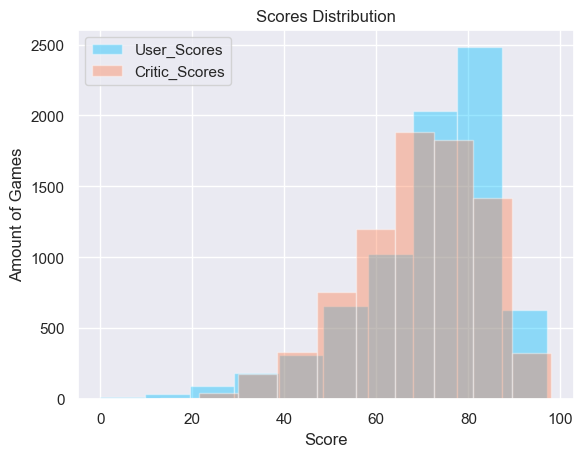

In [646]:
fig, ax = plt.subplots()
df.hist(column = 'User_Score', ax = ax, alpha = 0.4, label = 'User_Scores', color = 'deepskyblue')
df.hist(column = 'Critic_Score', ax = ax, alpha = 0.4, label = "Critic_Scores", color = 'coral')
ax.set_title("Scores Distribution")
ax.set_xlabel("Score")
ax.set_ylabel("Amount of Games")
ax.legend()
plt.show()

__Вывод__: распределение критиков ближе к нормальному, их решения могут быть более обоснованы

### Рейтинг

Посмотрим, почему такое большое количество пропусков в столбце __Rating__

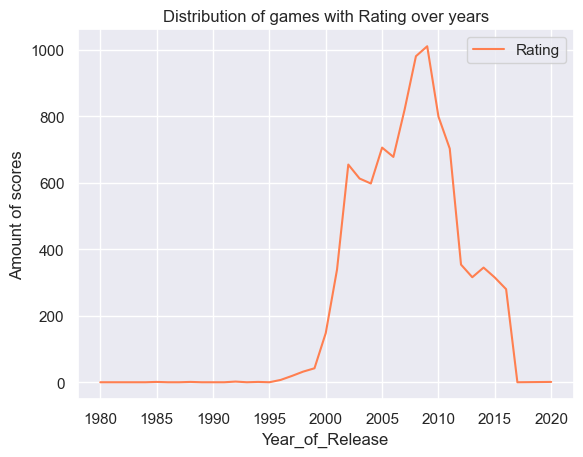

In [647]:
critic_scores_by_year = df.groupby('Year_of_Release')['Rating'].count().reset_index()
critic_scores_by_year.plot(x = 'Year_of_Release', 
                           y = 'Rating', 
                           ylabel = 'Amount of scores', 
                           title = 'Distribution of games with Rating over years', color = 'coral')
plt.show()

Такое распределение связано с тем, что ESRB появилась в 1994 году

Посмотрим на распределение игр по годам

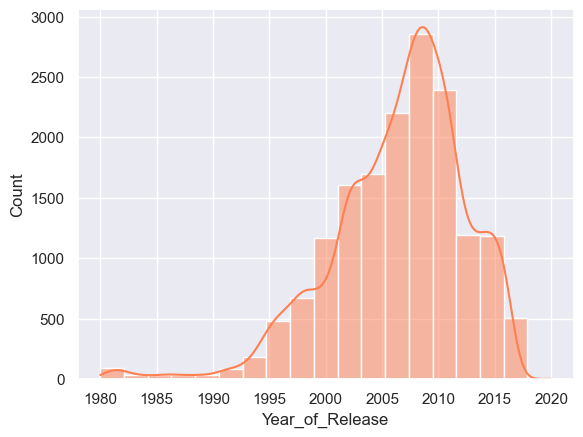

In [648]:
sns.histplot(data = df, x = 'Year_of_Release', bins = 19, stat = 'count', kde = True, color = 'coral');

__Вывод__:  
1. Рейтинг у игр начал появляться после появления ESRB в 1994 году.
2. Игры массово стали выпускаться ближе к 2000 году.

### Продажи

#### По регионам

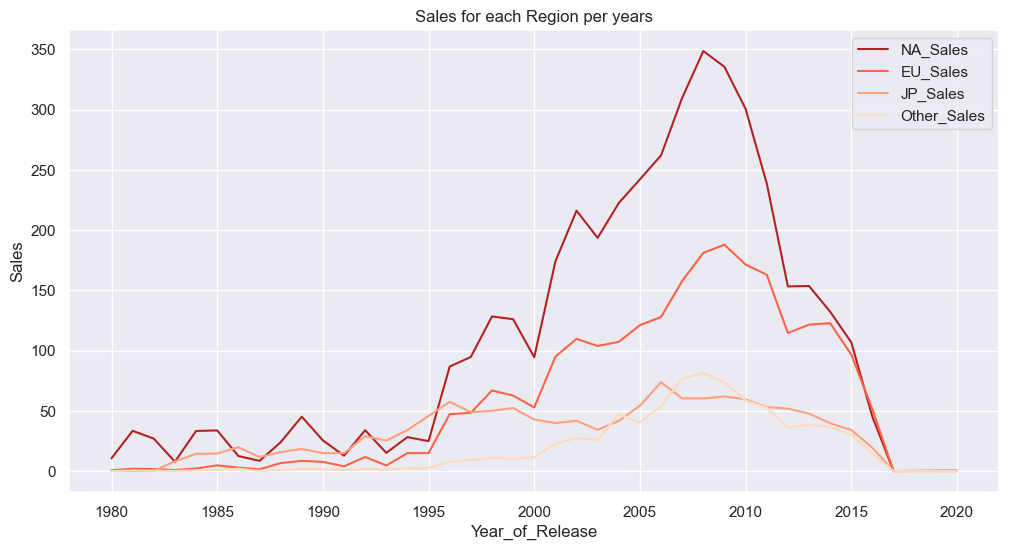

In [649]:
sales_per_year = df[["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby("Year_of_Release").sum().reset_index()
fig, ax = plt.subplots(figsize = (12, 6), )
sales_per_year.plot(x = 'Year_of_Release', ax = ax, color = ['firebrick', 'tomato', 'lightsalmon', 'peachpuff'])
ax.set_title('Sales for each Region per years')
ax.set_ylabel('Sales')
plt.show()

Видим, что продажи в Японии сравнимы с продажами в остальных странах, а продажи в NA и EU самые большие.  
Дополнительно просмотрим на процент продаж

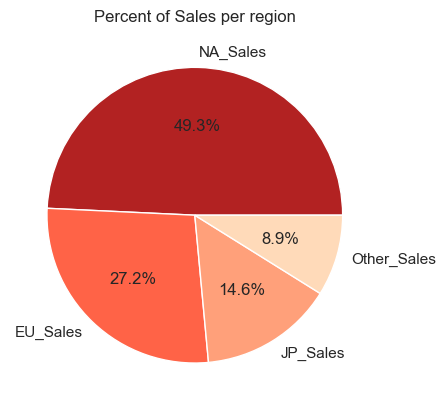

In [650]:
total_sales = sales_per_year.drop('Year_of_Release', axis = 1, inplace = False).sum()
fig, ax = plt.subplots()
ax.pie(x = total_sales.values, labels = total_sales.index, autopct='%1.1f%%', colors = ['firebrick', 'tomato', 'lightsalmon', 'peachpuff'])
ax.set_title('Percent of Sales per region')
plt.show()

__Вывод__:
1. Игры наиболее активно продаются в Северной Америке (NA) и Европе (EU)
2. Игры сравнительно мало продаются в Японии и остальных странах

Таким образом, возможно, стоит сделать акцент на продаже игр именно в NA и EU.

#### По платформам

In [651]:
len(df.Platform.unique())

31

Для начала посмотрим, на какие платформы выходило больше всего игр

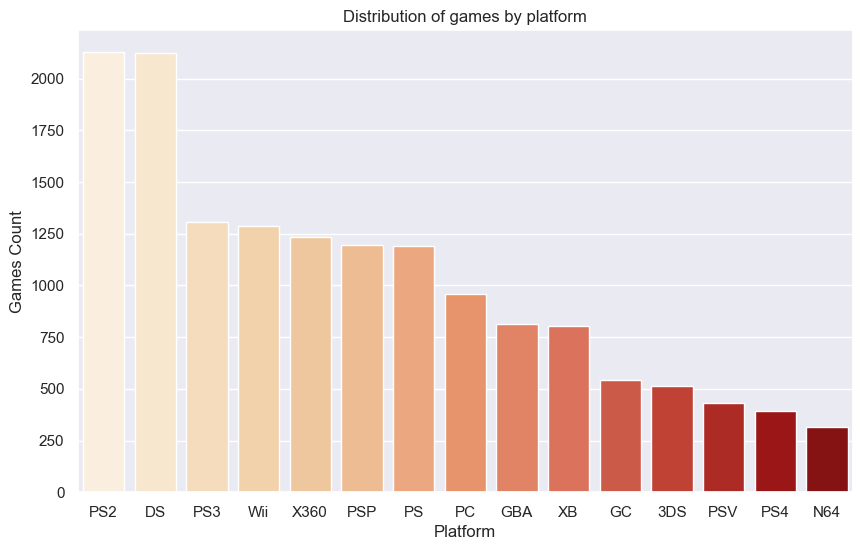

In [652]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (10, 6))
most_common_platforms = df.Platform.value_counts().nlargest(15)
sns.barplot(x = most_common_platforms.index, y = most_common_platforms.values, palette = 'OrRd')
plt.xticks(rotation = 0)
ax.set_ylabel('Games Count')
ax.set_title('Distribution of games by platform')
plt.show()

Заметим, что больше всего игр появляется на PS2, DS, PS3, Wii, X360

Платформ слишком много, поэтому будем анализировать только для 7 наиболее прибыльных

In [654]:
most_marginal_platforms = set(df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)[:7].index)
most_marginal_platforms

{'DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360'}

Посчитаем суммарные продажи по платформам и по годам

In [656]:
sales_per_platform = df[df['Platform'].isin(most_marginal_platforms)].pivot_table(
    values = 'Global_Sales',
    index = 'Year_of_Release',
    columns = 'Platform',
    aggfunc = 'sum'
).fillna(0)
sales_per_platform.head()

Platform,DS,PS,PS2,PS3,PS4,Wii,X360
Year_of_Release,,,,,,,
1985,0.02,0.00,0.0,0.0,0.0,0.0,0.0
1994,0.00,6.02,0.0,0.0,0.0,0.0,0.0
1995,0.00,35.92,0.0,0.0,0.0,0.0,0.0
1996,0.00,94.68,0.0,0.0,0.0,0.0,0.0
1997,0.00,136.08,0.0,0.0,0.0,0.0,0.0


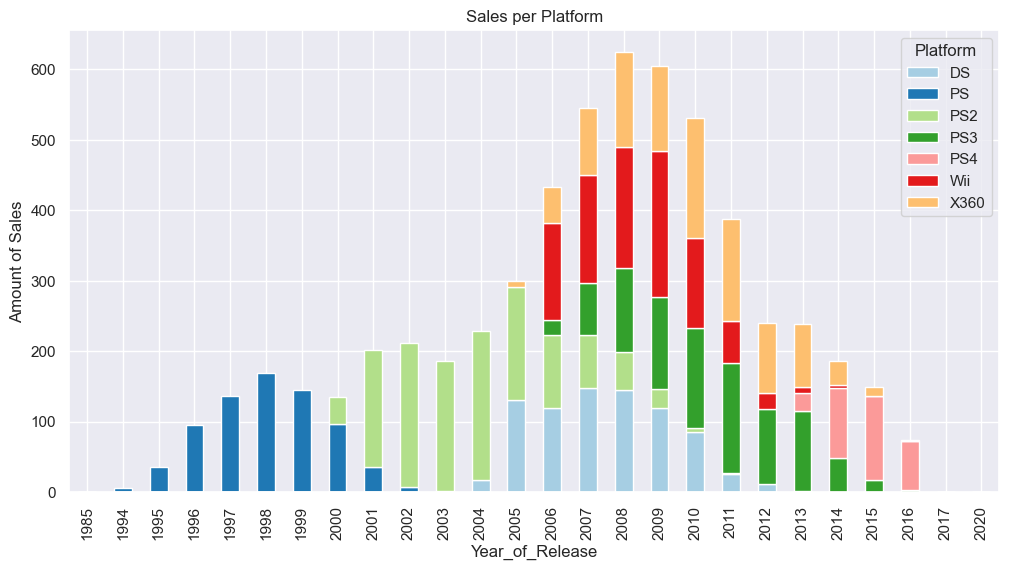

In [657]:
palette = sns.color_palette('Paired')
colors = palette[:7]
ax = sales_per_platform.plot(kind = 'bar', 
                             stacked = True,
                             color = colors, 
                             ylabel = 'Amount of Sales', 
                             title = 'Sales per Platform',
                             figsize = (12, 6))
# for c in ax.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     ax.bar_label(c, labels=labels, label_type='center', rotation = 90)
plt.show()

__Вывод__:
1. Наибольшее число продаж было совершено между 2001 и 2011 годами.
2. Наиболее популярными платформами были: Wii, PS3, X360, DS.
3. К 2016 году наблюдается большой прирост продаж PS4.

Таким образом, возможно, стоит сделать акцент на платформах, упомянутых в пункте 2 и 3, особенно PS3, X360, PS4. (Данных за 2016 год мало, поэтому сделать вывод о других платформах не представляется возможным)

### Более подробный анализ для потенциально перспективных платформ

In [658]:
promising_platforms = ['Wii', 'PS3', 'X360', 'DS', 'PS4']
best_platf_df = df[(df['Platform'].isin(promising_platforms)) & (df['Year_of_Release'] > 2010)]
best_platf_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,82.0,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,34.0,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,53.0,922.0,Treyarch,M


#### Влияние отзывов критиков и рейтинга на продажи

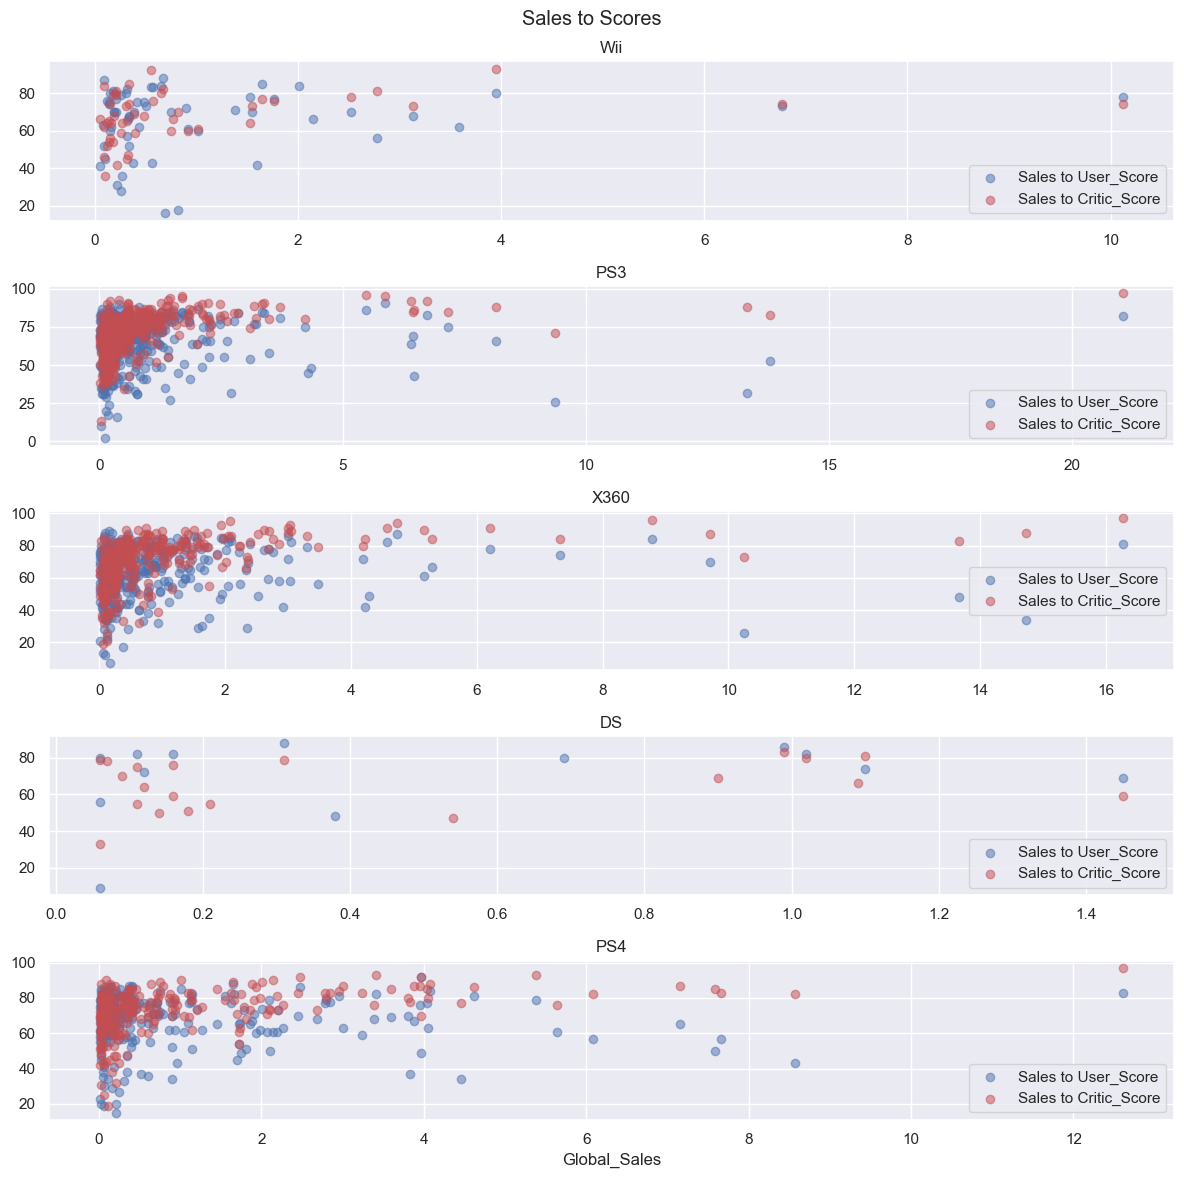

In [659]:
fig, ax = plt.subplots(5, 1, figsize = (12,12))
for i, platform in enumerate(promising_platforms):
    platform_data = best_platf_df[best_platf_df['Platform'] == platform][['Critic_Score', 'User_Score', 'Global_Sales']]
    x, y1, y2 = platform_data['Global_Sales'].values, platform_data['User_Score'].values, platform_data['Critic_Score'].values
    ax[i].scatter(x, y1, color = 'b', alpha = 0.5, label = 'Sales to User_Score')
    ax[i].scatter(x, y2, color = 'r', alpha = 0.5, label = 'Sales to Critic_Score')
    ax[i].set_title(platform)
    ax[i].legend()

ax[-1].set_xlabel('Global_Sales')
fig.suptitle('Sales to Scores')
plt.tight_layout()
plt.show()

Для каждой платформы подсчитаем корреляцию продаж с отзывами критиков и пользователей.  
Дополнительно включим сюда потенциальное влияние рейтинга на продажи

In [660]:
corr_dict = {'corr_with_critic_score': [], 'corr_with_user_score': [], 'corr_with_rating': []}
rating_to_num = {
    np.nan: 0,
    'EC': 1,
    'E': 2,
    'E10+': 3,
    'K-A': 3, # неизвестный рейтинг, присвоим среднее значение
    'T': 4,
    'M': 5,
    'AO': 6,
    'RP': 7
}
for platform in promising_platforms:
    platform_data = best_platf_df[best_platf_df['Platform'] == platform][['Critic_Score', 'User_Score', 'Rating', 'Global_Sales']]
    platform_data['encoded_rating'] = [rating_to_num[value] for value in platform_data['Rating'].values]
    corr_dict['corr_with_critic_score'].append(platform_data['Global_Sales'].corr(platform_data['Critic_Score']))
    corr_dict['corr_with_user_score'].append(platform_data['Global_Sales'].corr(platform_data['User_Score']))
    corr_dict['corr_with_rating'].append(platform_data['Global_Sales'].corr(platform_data['encoded_rating']))
corr_df = pd.DataFrame(data = corr_dict, index = promising_platforms)
corr_df

,corr_with_critic_score,corr_with_user_score,corr_with_rating
Wii,0.292564,0.145565,0.161813
PS3,0.382057,0.012911,0.231433
X360,0.391098,0.039014,0.189670
DS,0.261033,0.281866,0.018560
PS4,0.406846,-0.032011,0.177774


__Вывод__:
1. Чаще всего отзывы критиков сильно влияют на продажи.
2. Отзывы игроков слабее влияют на продажи, чем отзывы критиков.
3. Есть корреляция между возрастным ограничением и продажами игр.

Таким образом, продавцам игр, возможно, стоит обращать внимание на отзывы критиков, это может улучшить продажи продукта.  
Кроме того, игры с более высоким возрастным ограничением могут быть более привлекательными

#### Влияние регионов на продажи

Посмотрим, какие платформы предпочитает каждый регион. Это позволит потенциальному продавцу понять, на каком рынке делать акцент.

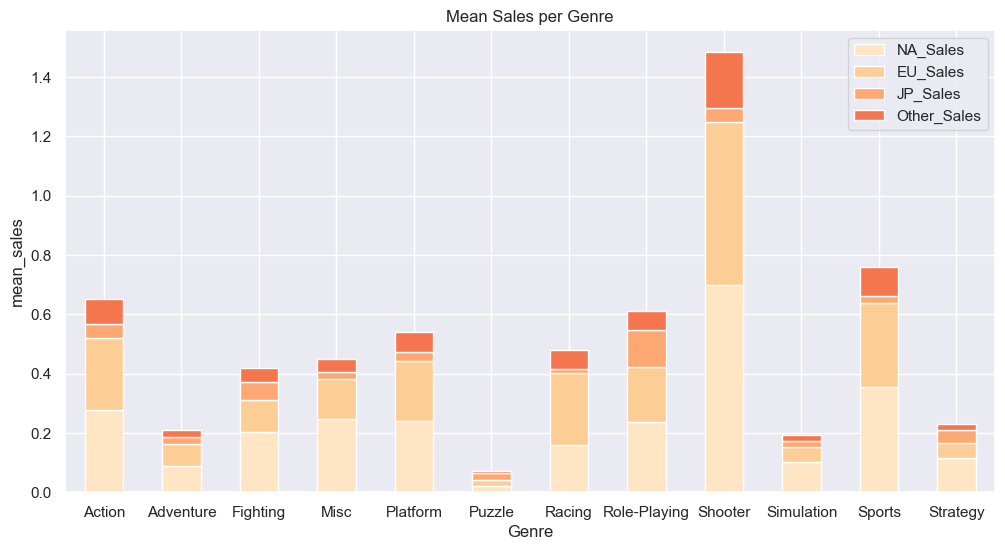

In [661]:
regions_to_sales = best_platf_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
fig, ax = plt.subplots(figsize = (12, 6))
regions_to_sales.plot(kind = 'bar', 
                      stacked = True, 
                      ylabel = 'mean_sales', 
                      color = sns.color_palette('OrRd')[:4], 
                      ax = ax,
                      title = 'Mean Sales per Genre')

ax.set_xticks(ax.get_xticks())  # Refresh tick locations
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
plt.show()

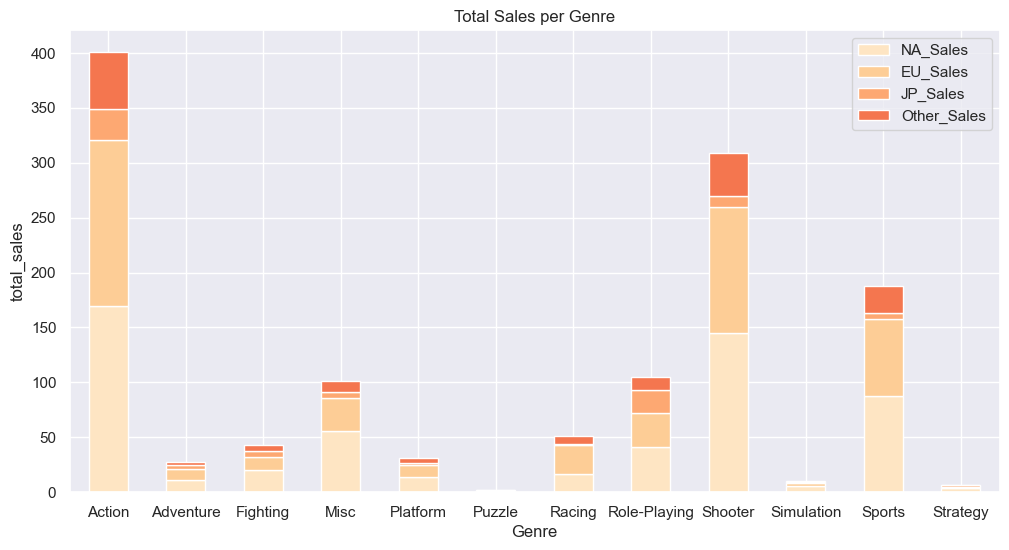

In [662]:
regions_to_sales = best_platf_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
fig, ax = plt.subplots(figsize = (12, 6))
regions_to_sales.plot(kind = 'bar', 
                      stacked = True, 
                      ylabel = 'total_sales', 
                      color = sns.color_palette('OrRd')[:4], 
                      ax = ax,
                      title = 'Total Sales per Genre')

ax.set_xticks(ax.get_xticks())  # Refresh tick locations
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
plt.show()

In [663]:
best_platf_df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales']
].sum().apply(lambda col: col / col.sum(), axis = 0).map('{:.2%}'.format)

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
DS,3.35%,2.01%,9.38%
PS3,29.44%,35.45%,57.60%
PS4,19.03%,30.66%,18.66%
Wii,8.50%,6.43%,10.46%
X360,39.69%,25.45%,3.91%


__Вывод__:  
* Самыми популярными жанрами за последние 6 лет являются: __Action__, __Shooter__, __Sports__.
* В среднем продажи игр в жанре __Shooter__ сильно больше продаж игр других жанров. Однако общие продажи игр жанра __Shooter__ уступают __Action__. 
* Игровые рынки Северной Америки и Европы являются крупнейшими в мире.
* На всех рынках платформа __PS__ является наиболее популярной.

## Подтверждение или опровержение гипотез. Общий вывод

### Гипотеза 1: Наиболее популярными жанрами являются Shooter и Action

Гипотеза __подтверждена__, эти жанры действительно являются наиболее популярными по всем регионам.

### Гипотеза 2: Платформы от Microsoft являются более популярными, чем платформы от Sony.

Гипотеза __опровергнута__, платформы от Sony (наблюдения с 2010 по 2016 год) превосходят платформы от Microsoft по процентам продаж во всех регионах

### Общий вывод

1. Самыми прибыльными платформами являются платформы от Sony и Microsoft.
2. Самыми популярными жанрами игр являются __Shooter__ и __Action__.
3. Рынки Северной Америки и Европы являются самыми важными для сбыта.
4. В Северной Америке X360 занимает большУю часть рынка (практически 40%).
5. Высокие отзывы критиков могут положительно влиять на продажи игр.
6. Игры с высоким возрастным ограничением могут быть привлекательнее для большинства пользователей.